In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  


Nothing done.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d
import math

In [120]:
# p: parametros [m,b], x: datos
# funcion lineal

def linea(x,m,b):
    return m*x+b

def lnlike(p,data):
    m=p[0]
    b=p[1]
    lnL=-(data[1]-linea(data[0],m,b))**2/(2*data[2]**2)-np.log(2*np.pi*data[2]**2)
    return lnL.sum()

def f(p,x):
    z=((x[1]-(p[0]*x[0]+p[1]))**2/(2*x[2]**2))
    return z

def L(p,x):
    L=0
    for i in range(len(x)):
        L=L-np.log((2*np.pi*x[2,i]**2))-f(p,x)[i]
    return L

# ----------------------------------------------------------
def prim(m,Pm=0):

    if minm < m and maxm > m:
        return Pm
    else:
        return 0


def prib(b,Pb=0):

    if minb < b and maxb > b:
        return Pb
    else:
        return 0


# ----------------------------------------------------------
def pos(p,x,Pm,Pb):
    m,b=p[0],p[1]
    z=L(p,x)+np.log(prib(b,Pb)*prim(m,Pm))
    return z

def posterior(p,x,Pm,Pb):
    m,b=p[0],p[1]
    ln_like=lnlike(p,x)
    ln_prior=np.log(prib(b,Pb)*prim(m,Pm))
    z=ln_like+ln_prior
#    print(ln_like,ln_prior)
    return z

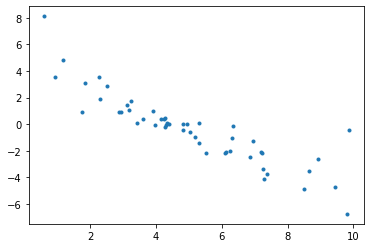

In [121]:
db = np.load('/Users/almagonzalez/Documents/cursos/DataAnalysis/DCIDA2020II/data/fit_exercise.npy')
plt.plot(db[0],db[1],'.')

In [122]:
# punto de inicio, p=[m,b]
O=[0,0]

# número pasos
s=50000

# guardar los datos
h=np.zeros([s+1,2])
h[0]=O

# ----------------------------------------------------
minm=-2
maxm=2
Pm=1/(maxm-minm)

minb=-10
maxb=10
Pb=1/(maxb-minb)

In [150]:

m0=-0.9 #h[0,0]
b0=4.8 #h[0,1]

# sigma para los datos aleatorios
sig =0.2  #deberiasn ser diferentes sigmas para m y b pero en est caso tienen un rango similar

posn_v=np.zeros(s+1)
#posv=pos(h[0],db,Pm,Pb)
posv=posterior(h[0],db,Pm,Pb)

In [151]:
posterior(h[0],db,Pm,Pb)

-2929.6770997294993

In [161]:
a=[]
b=[]
count=0
count1= 0
for i in range(s):

    m1= (np.random.normal(m0,sig,1))
    b1= (np.random.normal(b0,sig,1))
    
    #posn = pos([m1,b1],db,Pm,Pb)
    posn = posterior([m1,b1],db,Pm,Pb)
    h[i+1]=[m1,b1]
    
    posn_v [i]= posn-posv
      
    if posn > posv*1: 
        posv = np.copy(posn)
       m0 = np.copy(m1)
        #b0 = np.copy(b1)
        count = count+1
        a.append(m1)
        b.append(b1)
        
    elif posn_v[i] > np.log(np.random.rand()):
        posv = np.copy(posn)
        m0 = np.copy(m1)
        b0 = np.copy(b1)
        
        count1 = count1+1
        a.append(m0)
        b.append(b0)



530
545


Text(0, 0.5, 'b')

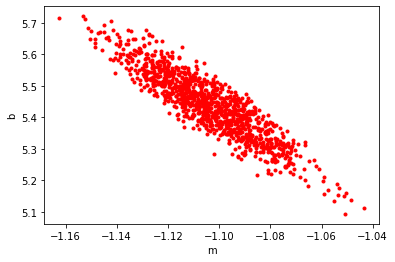

In [162]:
print(count)
print(count1)
#plt.plot(h[3000:,0],h[3000:,1],'.')
plt.plot(a,b,'r.')
plt.xlabel('m')
plt.ylabel('b')

In [163]:
len(a)

1075

530
545


Text(0, 0.5, 'b')

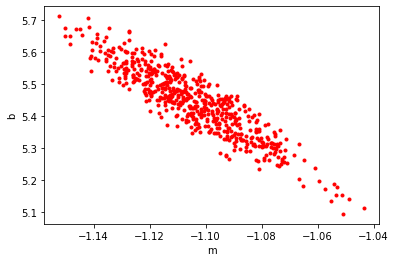

In [164]:
print(count)
print(count1)
#plt.plot(h[3000:,0],h[3000:,1],'.')
plt.plot(a[500:],b[500:],'r.')
plt.xlabel('m')
plt.ylabel('b')

In [166]:
a

[array([-1.10165549]),
 array([-1.10431324]),
 array([-1.1255556]),
 array([-1.12245226]),
 array([-1.11205061]),
 array([-1.09003454]),
 array([-1.11364637]),
 array([-1.11151131]),
 array([-1.12502978]),
 array([-1.1387025]),
 array([-1.09166571]),
 array([-1.13166904]),
 array([-1.12855154]),
 array([-1.1090672]),
 array([-1.11057902]),
 array([-1.09907213]),
 array([-1.1183195]),
 array([-1.10235808]),
 array([-1.09304733]),
 array([-1.09094023]),
 array([-1.12243115]),
 array([-1.09214851]),
 array([-1.12877663]),
 array([-1.10868938]),
 array([-1.08674625]),
 array([-1.07738398]),
 array([-1.08845639]),
 array([-1.09365008]),
 array([-1.09355152]),
 array([-1.07885122]),
 array([-1.10715163]),
 array([-1.11171148]),
 array([-1.11002984]),
 array([-1.09305692]),
 array([-1.10853867]),
 array([-1.11350512]),
 array([-1.08422501]),
 array([-1.10655989]),
 array([-1.0811927]),
 array([-1.07354604]),
 array([-1.06642498]),
 array([-1.09196549]),
 array([-1.1185049]),
 array([-1.100786

In [156]:
np.flaten?

Object `np.flaten` not found.


In [157]:
a=np.flatten()

AttributeError: module 'numpy' has no attribute 'flatten'

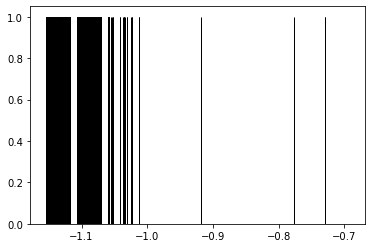

In [158]:
plt.hist(a, edgecolor='black', label='m');

/Users/almagonzalez/miniconda3.8/envs/DA2020II/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


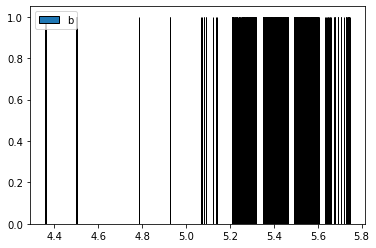

In [159]:
plt.hist(b, edgecolor='black',label='b');
plt.legend()

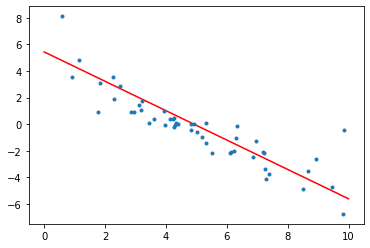

In [160]:
xmin=0
xmax=10
dt=(xmax-xmin)/len(h[:,0])

t=np.arange(xmin,xmax,dt)
y=np.median(a)*t+np.median(b)

plt.plot(t,y,'r')
plt.plot(db[0],db[1],'.')